# Weighted Estimation for Stock Price

In [7]:
#Initialization

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [8]:
import fix_yahoo_finance as yf  


Stocks = ['AAPL', 'FB','GOOGL','AMZN']
data = yf.download(Stocks,'2016-01-01','2018-06-01')

[*********************100%***********************]  4 of 4 downloaded


In [9]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 608 (major_axis) x 4 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2016-01-04 00:00:00 to 2018-06-01 00:00:00
Minor_axis axis: AAPL to GOOGL

# Amazon stock price

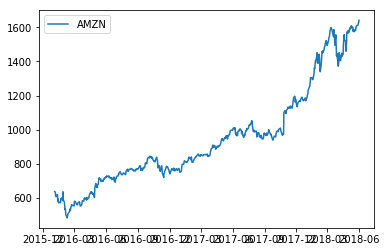

In [20]:
St = data['Adj Close']['AMZN']
plt.plot(St)
plt.legend(['AMZN'])

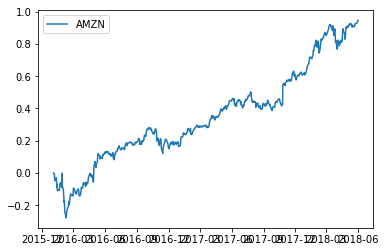

In [23]:
# Take the log price
LogSt = np.log(St) - np.log(St[0])
plt.plot(LogSt)
plt.legend(['AMZN'])


# Prediction of different models

N-day return estimation




In [66]:
N_day = 30
T = len(St)
S_nd = np.zeros(T-N_day)
for t in range(N_day,T):
    S_nd[t-N_day] = (LogSt[t] - LogSt[t-N_day])/N_day + LogSt[t]


Mean reversion - OU model

In [67]:
S_ou = np.zeros(T-N_day)
for t in range(N_day,T):
    train = np.array(LogSt[t-N_day:t])
    #fit linear regression
    y = train[1:] - train[:-1]
    x = train[:-1]
    param = np.polyfit(x,y,1)
    beta = -param[0]
    mu = param[1]/beta
    dx = beta*(mu - train[-1])
    S_ou[t-N_day] = LogSt[t] + dx



plot prediction

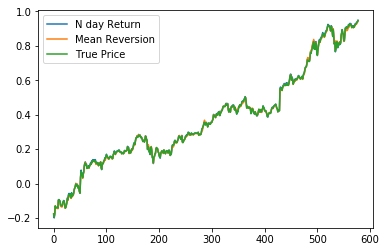

In [68]:
plt.plot(S_nd)
plt.plot(S_ou)
plt.plot(np.array(LogSt[N_day:]))
plt.legend(['N day Return', 'Mean Reversion', 'True Price'])

Plot deviation from true price

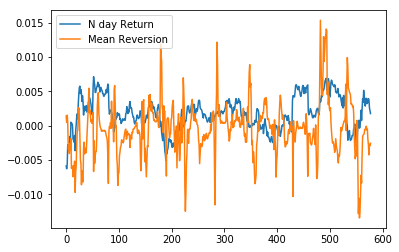

In [69]:
plt.plot(S_nd-np.array(LogSt[N_day:]))
plt.plot(S_ou-np.array(LogSt[N_day:]))
plt.legend(['N day Return', 'Mean Reversion'])


# Weighted Estimation Based on Regret

Average regret of Weighted Estimation is 5.81535639191e-06
Average regret of N day Return is 9.00134089259e-06
Average regret of Mean Reversion is 1.49258928934e-05


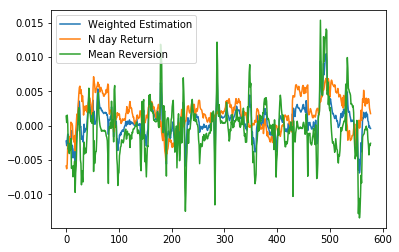

In [70]:
WEst = np.zeros(T-N_day)
reg_nd = 0
reg_ou = 0
for t in range(N_day,T):
    w_nd = np.exp(-reg_nd)/(np.exp(-reg_nd) + np.exp(-reg_ou))
    w_ou = np.exp(-reg_ou)/(np.exp(-reg_nd) + np.exp(-reg_ou))
    WEst[t-N_day] = w_nd*S_nd[t-N_day] + w_ou*S_ou[t-N_day]
    #use square loss as the regret
    reg_nd += (S_nd[t-N_day] - LogSt[t])**2
    reg_ou += (S_ou[t-N_day] - LogSt[t])**2

plt.plot(WEst-np.array(LogSt[N_day:]))
plt.plot(S_nd-np.array(LogSt[N_day:]))
plt.plot(S_ou-np.array(LogSt[N_day:]))
plt.legend(['Weighted Estimation', 'N day Return', 'Mean Reversion'])

print('Average regret of Weighted Estimation is',np.mean(np.power(WEst-np.array(LogSt[N_day:]),2)))
print('Average regret of N day Return is',np.mean(np.power(S_nd-np.array(LogSt[N_day:]),2)))
print('Average regret of Mean Reversion is',np.mean(np.power(S_ou-np.array(LogSt[N_day:]),2)))